<a href="https://colab.research.google.com/github/ryoshi007/DepressionIndicator/blob/master/Depression_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load the Data

In [1]:
# importing necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt # for plotting data and creating different charts
import numpy as np # for math and arrays
import pandas as pd # for operation on data
import seaborn as sns # for plotting

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ryoshi007/DepressionIndicator/master/clean_data.csv")
data

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,Total_Count,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,2,16,1,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,2,16,1,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,17,1,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,2,13,1,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,19,1,Secondary Children,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2,36,1,16,1,Primary Children,Extremely Severe
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3,38,1,21,1,Secondary Children,Extremely Severe
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0,4,2,48,2,Elder Adults,Normal
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2,16,2,20,1,Secondary Children,Moderate


In [3]:
print(f'Number of rows/examples and columns in the dataset: {data.shape}')

Number of rows/examples and columns in the dataset: (39775, 20)


In [4]:
# Summary of information on the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Optimistic          39775 non-null  int64 
 1   Motivation          39775 non-null  int64 
 2   Looking-Forward     39775 non-null  int64 
 3   Sadness             39775 non-null  int64 
 4   Interest            39775 non-null  int64 
 5   Existential-Crisis  39775 non-null  int64 
 6   Importance          39775 non-null  int64 
 7   Enjoyment           39775 non-null  int64 
 8   Down-hearted        39775 non-null  int64 
 9   Enthusiasm          39775 non-null  int64 
 10  Worthiness          39775 non-null  int64 
 11  Hopefulness         39775 non-null  int64 
 12  Meaningless         39775 non-null  int64 
 13  Tiredness           39775 non-null  int64 
 14  Total_Count         39775 non-null  int64 
 15  gender              39775 non-null  int64 
 16  age                 39

# Cleaning the Data

In [5]:
# Drop unnecesary column
data.drop("Age_Groups", inplace=True, axis=1)
data.drop("Total_Count", inplace=True, axis=1)

In [6]:
print("Display NA values in each columns: ")
data.isna().sum(axis = 0)

Display NA values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [7]:
print("Display NULL values in each columns: ")
data.isnull().sum()

Display NULL values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data = data.sample(frac = 1) # Randomly shuffle the rows to make sure data is not sorted

In [10]:
data.describe()

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,1.226097,1.521458,1.447316,1.784538,1.519573,1.658605,1.349591,1.437109,1.658580,1.376820,1.633991,1.373551,1.392759,1.680101,1.794595,23.612168,1.174255
std,1.038526,1.069908,1.139350,1.073779,1.110826,1.157063,1.166096,1.050809,1.066779,1.043797,1.151208,1.139862,1.187423,1.032528,0.440845,21.581722,0.456738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,18.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,21.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,25.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1998.000000,3.000000


# Fix the Incorrect Cata

In [11]:
for (index, row) in data.iterrows():
  if (row.age >= 100):
    print(row.age)

1996
117
115
1991
1998
223
1993


In [12]:
data['age'] = data['age'].replace([1996, 1998, 1993, 223, 1991], [23, 21, 26, 23, 28])

In [13]:
data.describe()

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,1.226097,1.521458,1.447316,1.784538,1.519573,1.658605,1.349591,1.437109,1.658580,1.376820,1.633991,1.373551,1.392759,1.680101,1.794595,23.409026,1.174255
std,1.038526,1.069908,1.139350,1.073779,1.110826,1.157063,1.166096,1.050809,1.066779,1.043797,1.151208,1.139862,1.187423,1.032528,0.440845,8.607147,0.456738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,18.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,21.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,25.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,117.000000,3.000000


# Embedding the Label

In [14]:
# Convert label from non-numerical value to numerical value
data = data.replace("Normal", 1)
data = data.replace("Mild", 2)
data = data.replace("Moderate", 3)
data = data.replace("Severe", 4)
data = data.replace("Extremely Severe", 5)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39775 entries, 15077 to 39332
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Optimistic          39775 non-null  int64
 1   Motivation          39775 non-null  int64
 2   Looking-Forward     39775 non-null  int64
 3   Sadness             39775 non-null  int64
 4   Interest            39775 non-null  int64
 5   Existential-Crisis  39775 non-null  int64
 6   Importance          39775 non-null  int64
 7   Enjoyment           39775 non-null  int64
 8   Down-hearted        39775 non-null  int64
 9   Enthusiasm          39775 non-null  int64
 10  Worthiness          39775 non-null  int64
 11  Hopefulness         39775 non-null  int64
 12  Meaningless         39775 non-null  int64
 13  Tiredness           39775 non-null  int64
 14  gender              39775 non-null  int64
 15  age                 39775 non-null  int64
 16  married             39775 non-null  

# Split the data into train / test splits

In [16]:
# Split the data into 60% train and 40% test
train_dataset, temp_test_dataset = train_test_split(data, test_size=0.4)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(23865, 18)
(15910, 18)


In [17]:
# Split the temp_test_dataset dataframe to 50% test and 50% cross-validation
# Hence, the dataset is splitted into 60% train, 20% cross-validate and 20% test
test_dataset, cross_valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(cross_valid_dataset.shape)

(7955, 18)
(7955, 18)


In [18]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset           : {train_dataset.shape}")
print(f"Cross-Validation dataset: {test_dataset.shape}")
print(f"Test dataset            : {cross_valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset           : (23865, 18)
Cross-Validation dataset: (7955, 18)
Test dataset            : (7955, 18)


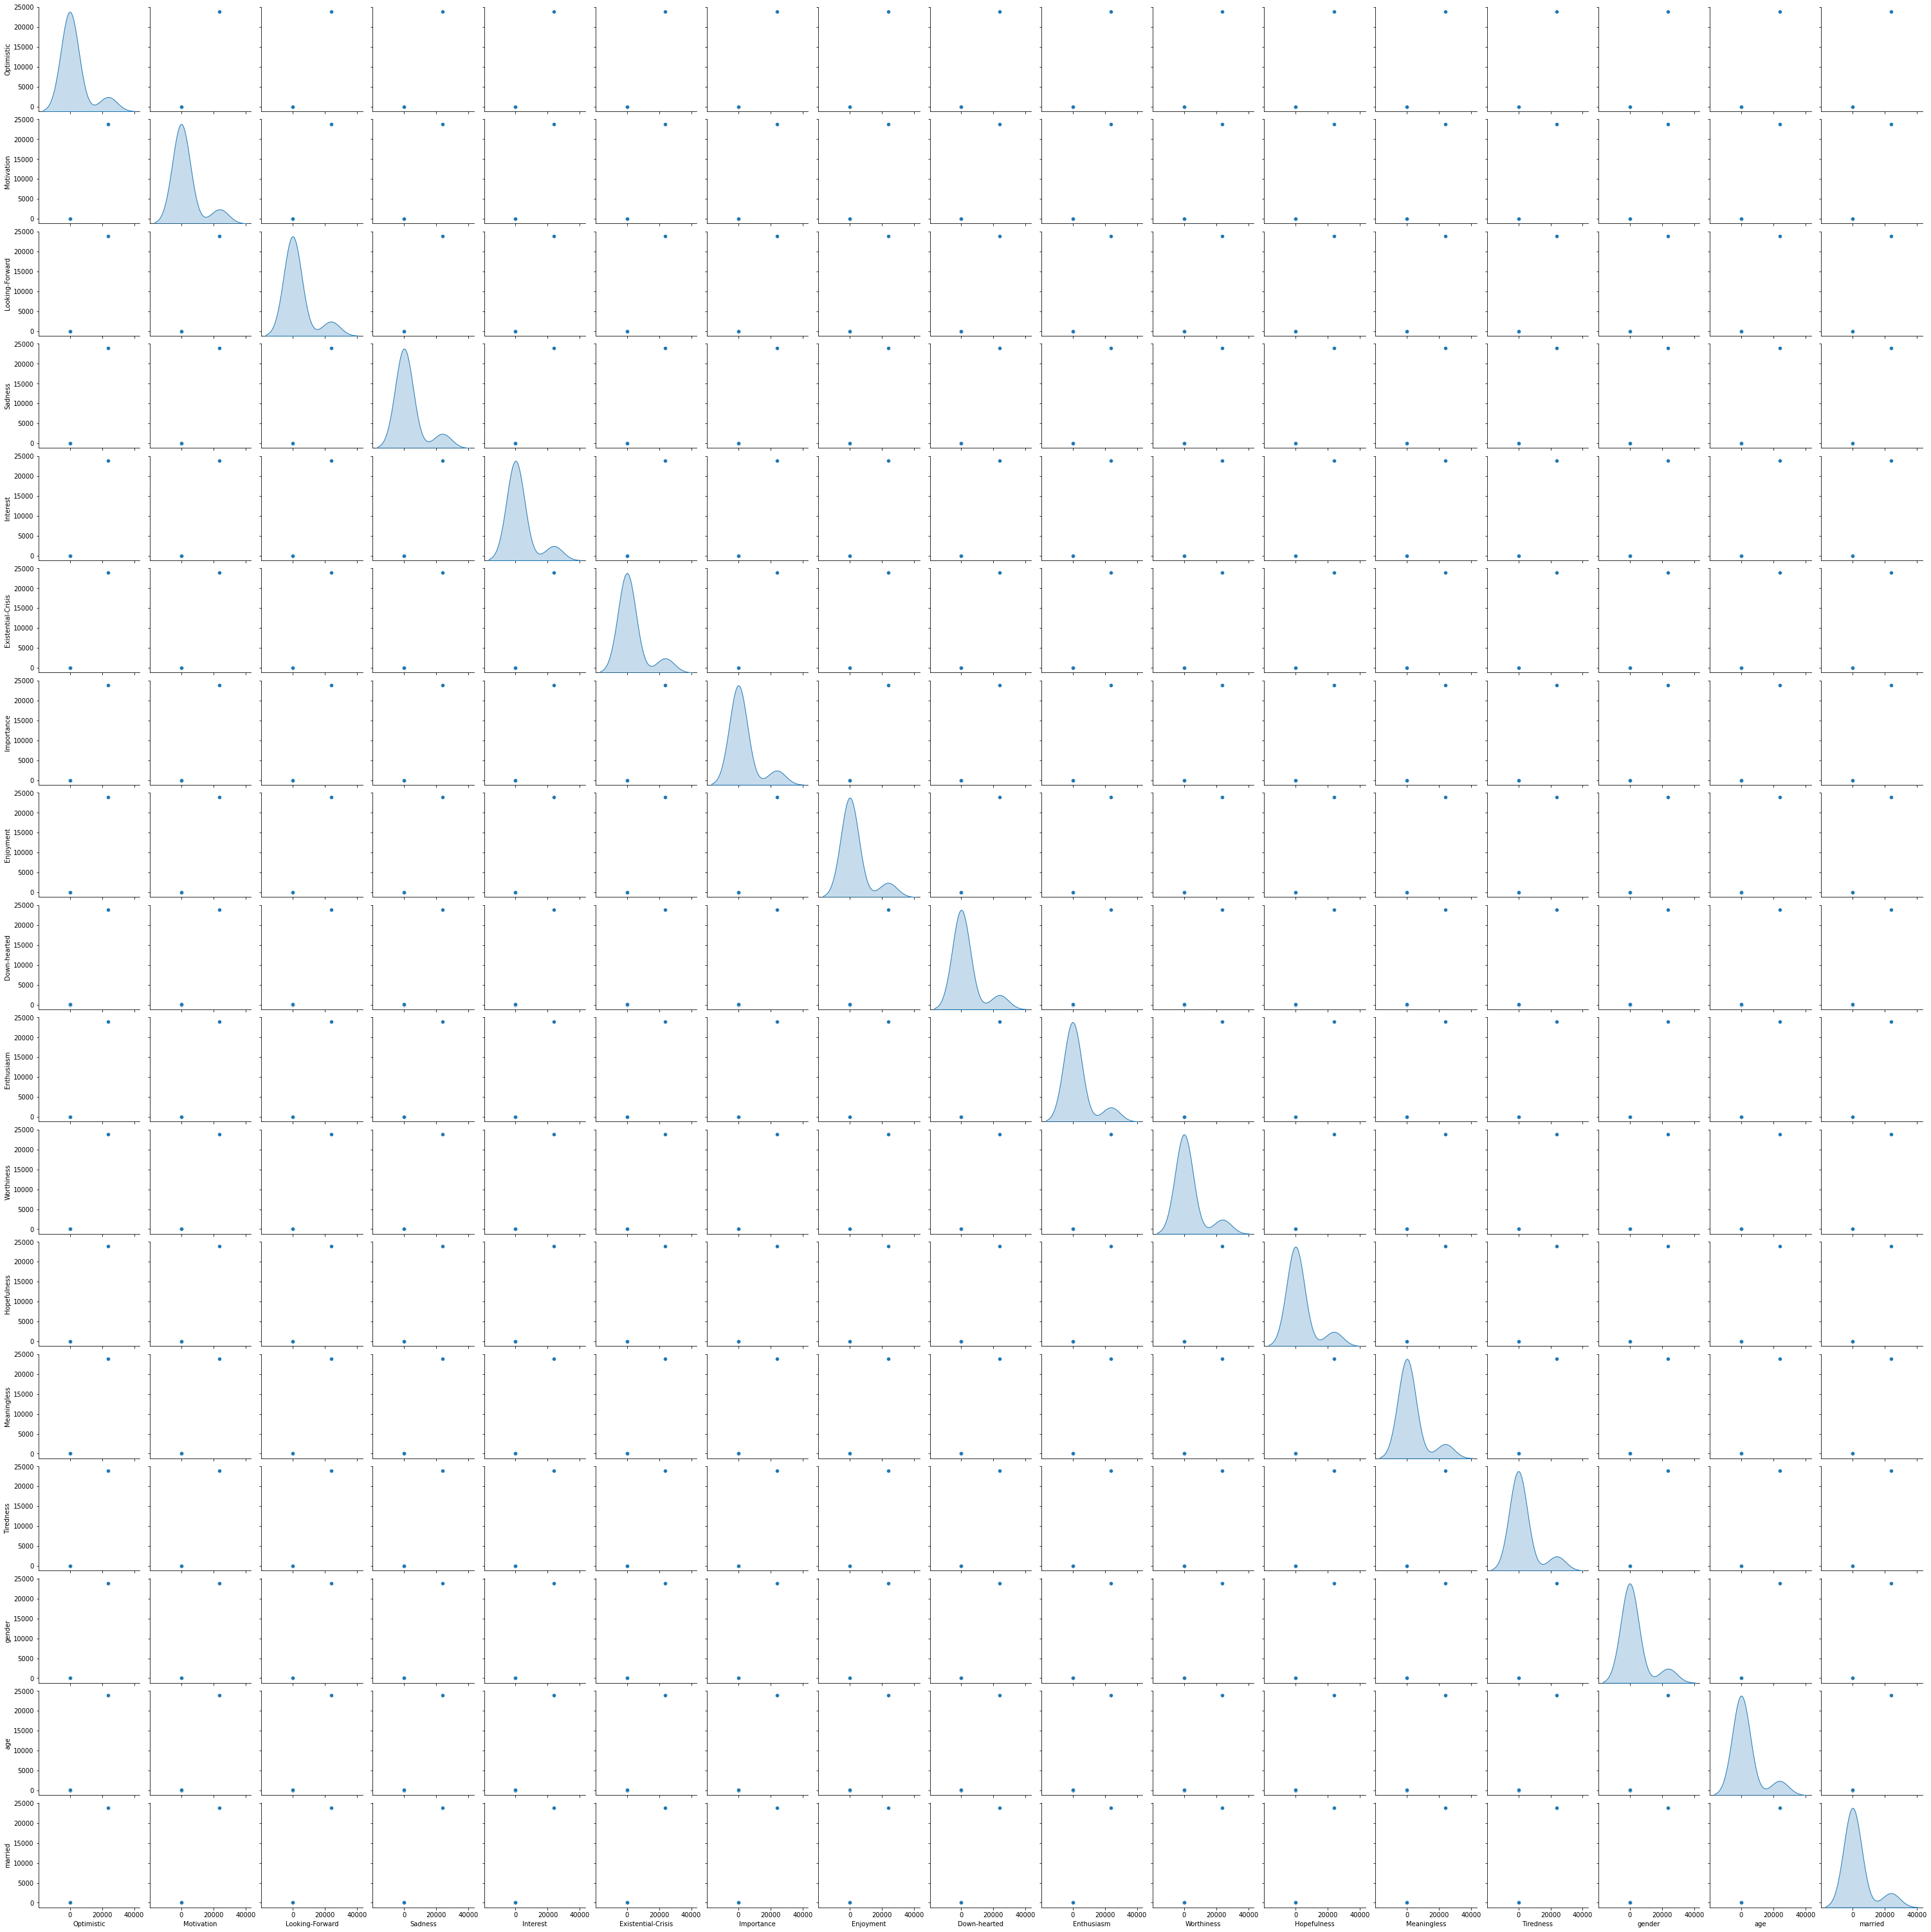

In [19]:
# Plot the relationship between each two variables to spot anything incorrect
train_stats = train_dataset.describe()
train_stats.pop("Condition")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [20]:
# Statistics on the train dataset to make sure it is in a good shape
train_stats = train_dataset.describe()
train_stats.pop("Condition")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Optimistic,23865.0,1.231427,1.040715,0.0,0.0,1.0,2.0,3.0
Motivation,23865.0,1.517369,1.069513,0.0,1.0,1.0,2.0,3.0
Looking-Forward,23865.0,1.448104,1.142576,0.0,0.0,1.0,3.0,3.0
Sadness,23865.0,1.785837,1.075868,0.0,1.0,2.0,3.0,3.0
Interest,23865.0,1.517704,1.112149,0.0,1.0,1.0,3.0,3.0
Existential-Crisis,23865.0,1.657113,1.158984,0.0,1.0,2.0,3.0,3.0
Importance,23865.0,1.352357,1.167680,0.0,0.0,1.0,2.0,3.0
Enjoyment,23865.0,1.442196,1.052560,0.0,1.0,1.0,2.0,3.0
Down-hearted,23865.0,1.661638,1.068762,0.0,1.0,2.0,3.0,3.0
Enthusiasm,23865.0,1.372428,1.043430,0.0,1.0,1.0,2.0,3.0


In [21]:
# Obtain the label
train_labels = train_dataset.pop("Condition")
test_labels = test_dataset.pop("Condition")
cross_valid_labels = cross_valid_dataset.pop("Condition")

# Data Normalization / Scaling

In [22]:
# Define a function to normalize the dataset
# Subtract the mean of the training data and divide by the standard deviaion of the training data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_cross_valid_data = norm(cross_valid_dataset)

In [23]:
print(f"Mean - {train_stats['mean']}")
print(f"Std - {train_stats['std']}")

Mean - Optimistic             1.231427
Motivation             1.517369
Looking-Forward        1.448104
Sadness                1.785837
Interest               1.517704
Existential-Crisis     1.657113
Importance             1.352357
Enjoyment              1.442196
Down-hearted           1.661638
Enthusiasm             1.372428
Worthiness             1.630086
Hopefulness            1.372847
Meaningless            1.392751
Tiredness              1.676556
gender                 1.793421
age                   23.448104
married                1.176493
Name: mean, dtype: float64
Std - Optimistic            1.040715
Motivation            1.069513
Looking-Forward       1.142576
Sadness               1.075868
Interest              1.112149
Existential-Crisis    1.158984
Importance            1.167680
Enjoyment             1.052560
Down-hearted          1.068762
Enthusiasm            1.043430
Worthiness            1.151607
Hopefulness           1.141410
Meaningless           1.188625
Tiredness    

In [24]:
# Show a sample of the data after normalized
normed_train_data.head(10)

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
9103,-1.183250,-0.483742,-1.267403,-0.730421,-1.364659,-1.429798,-1.158157,-1.370179,-1.554731,-0.356927,-1.415488,-1.202765,-1.171733,-1.625446,0.468914,-0.167439,-0.38494
24721,1.699382,-0.483742,1.358243,1.128542,0.433662,0.295852,1.411039,0.529950,1.252254,-1.315304,1.189567,1.425564,1.352192,0.313584,0.468914,-0.051813,-0.38494
18346,-1.183250,-1.418747,-1.267403,-1.659903,-1.364659,-0.566973,-1.158157,-1.370179,-1.554731,-1.315304,-1.415488,-1.202765,-1.171733,-1.625446,0.468914,0.410694,-0.38494
35119,0.738505,1.386267,-0.392187,1.128542,1.332822,0.295852,-1.158157,1.480015,-0.619070,1.559828,-0.547136,0.549455,-1.171733,0.313584,0.468914,-0.514320,-0.38494
16401,0.738505,-0.483742,1.358243,1.128542,1.332822,0.295852,1.411039,1.480015,1.252254,0.601451,1.189567,0.549455,1.352192,-0.655931,0.468914,0.063814,-0.38494
22732,-1.183250,-0.483742,-1.267403,-1.659903,-1.364659,-1.429798,-0.301758,-0.420114,-1.554731,-0.356927,-1.415488,-1.202765,-1.171733,-0.655931,0.468914,-0.745573,-0.38494
14063,-0.222373,-1.418747,-1.267403,-0.730421,-0.465499,-0.566973,-1.158157,-0.420114,0.316592,-1.315304,0.321216,-1.202765,-1.171733,-0.655931,0.468914,-0.398693,-0.38494
5218,1.699382,1.386267,0.483028,1.128542,1.332822,1.158676,0.554641,1.480015,1.252254,0.601451,1.189567,1.425564,1.352192,1.283099,0.468914,-0.398693,-0.38494
15890,1.699382,1.386267,1.358243,1.128542,1.332822,1.158676,1.411039,1.480015,1.252254,1.559828,1.189567,1.425564,1.352192,1.283099,0.468914,0.063814,-0.38494
2935,-1.183250,-1.418747,-1.267403,-1.659903,-1.364659,-1.429798,-1.158157,-1.370179,-1.554731,-1.315304,-1.415488,-1.202765,-1.171733,-1.625446,0.468914,-0.283066,-0.38494


# Training the Model

In [25]:
# Create a svm classifier
model = svm.SVC(C = 1, # regularization parameter
                kernel = 'rbf', #kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default = 'rbf',
                )

# Train the model using the training sets
fitted_model = model.fit(normed_train_data, train_labels)

# Predict the response for test dataset
y_pred = fitted_model.predict(test_dataset)

In [26]:
example_batch = normed_test_data[:10]
example_result = fitted_model.predict(example_batch)
print("predicted values:")
example_result

predicted values:


array([4, 5, 4, 1, 5, 5, 5, 1, 5, 1])

In [27]:
def plot_accuracy_curve(estimator, X, y):
    sizes, train_scores, test_scores = learning_curve(estimator=estimator,
                                                      X=X, y=y,
                                                      scoring="accuracy",
                                                      train_sizes=np.linspace(0.05, 1.0, 15),
                                                      cv = KFold(n_splits=3, random_state = 1, shuffle=True))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(sizes, train_scores_mean, "o-", color="red", label="training")
    plt.plot(sizes, test_scores_mean, "o-", color="green", label="testing")
    plt.legend(loc="lower right")
    plt.xlabel("Number of samples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

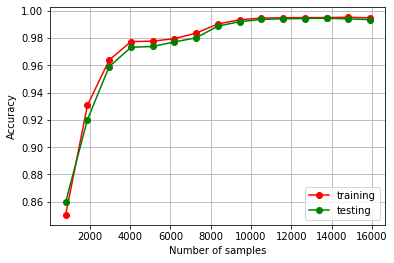

In [28]:
X = train_dataset
y = train_labels
estimator = svm.SVC(C = 1, # regularization parameter
                kernel = 'rbf', #kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default = 'rbf',
                )

# Estimate the accuracy of the model when facing unseen data
plot_accuracy_curve(estimator, X, y)

In [29]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

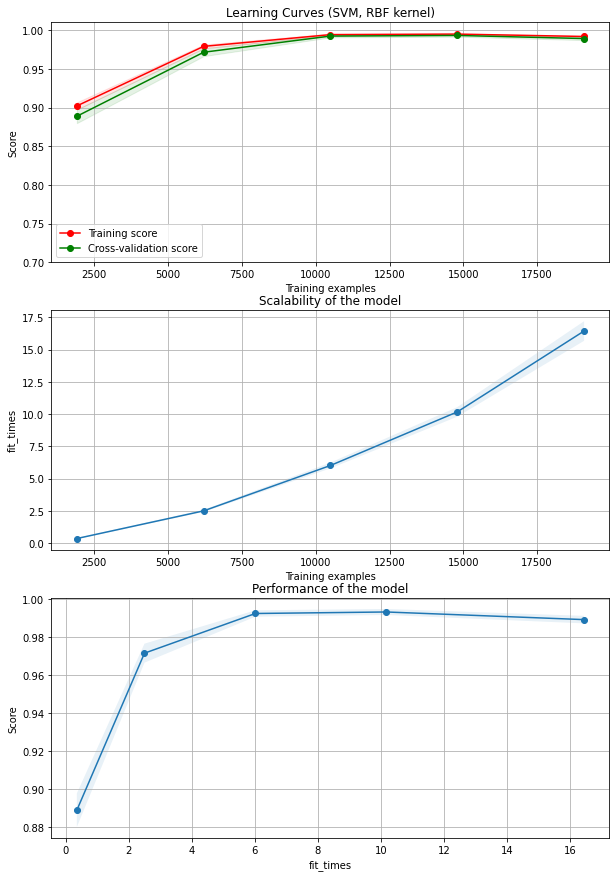

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

fig, axes= plt.subplots(3, 1, figsize=(10, 15))

title = r"Learning Curves (SVM, RBF kernel)"
X = train_dataset
y = train_labels
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = fitted_model
plot_learning_curve(
    estimator, title, X, y, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=3
)

plt.show()


In [31]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No handles with labels found to put in legend.


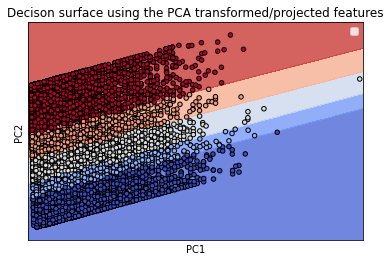

In [32]:
# Plot SVM decision boundary by using PCA to reduce the dimensionality
# Use linear SVM to plot the boundary

X = train_dataset
y = train_labels

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of rbf SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

# See How the Training Went

In [33]:
from sklearn import metrics
y_pred = fitted_model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9997904881625812


In [34]:
y_pred = fitted_model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9966059082338152


In [35]:
y_pred = fitted_model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9964802011313639


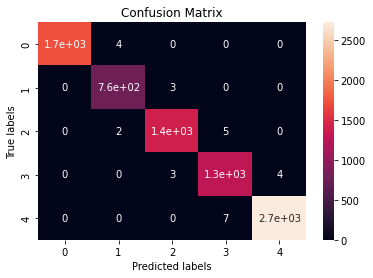

In [36]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = fitted_model.predict(normed_test_data)

cm = confusion_matrix(test_labels, predict_results)
sns.heatmap(cm, annot=True, ax=ax); # annot = True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


# Save the Model for Later Use


In [37]:
filename = "depression_model.sav"
import pickle as pk

pk.dump(fitted_model, open(filename, 'wb'))

In [38]:
# Test for the accuracy of the saved model
loaded_model = pk.load(open(filename, 'rb'))

y_pred = loaded_model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred)) 

Accuracy: 0.9997904881625812


In [39]:
y_pred = loaded_model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9966059082338152


In [40]:
y_pred = loaded_model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9964802011313639
